In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("covid_19.csv")

In [5]:
print(data.head())

   Unnamed: 0 Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
0           0    Afghanistan      36263   1269      25198    9796      106.0   
1           1        Albania       4880    144       2745    1991      117.0   
2           2        Algeria      27973   1163      18837    7973      616.0   
3           3        Andorra        907     52        803      52       10.0   
4           4         Angola        950     41        242     667       18.0   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0        10.0             18                3.50                  69.49   
1         6.0             63                2.95                  56.25   
2         8.0            749                4.16                  67.34   
3         0.0              0                5.73                  88.53   
4         1.0              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0  

In [6]:
data.set_index("Unnamed: 0", inplace=True)

data.index.name = "index"

In [7]:
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
index,,,,,,,,,,,,,,,
0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152.0,2.0,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0.0,0.0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10.0,4.0,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean


In [8]:
def clean_column_names(data):
    data.columns = data.columns.str.replace(" ", "_", regex=True)
    return data

data = clean_column_names(data)

In [9]:
print("Column Names:", data.columns)
print("Data Types:", data.dtypes)
print("Missing Values:")
print(data.isnull().sum())

Column Names: Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')
Data Types: Country/Region             object
Confirmed                   int64
Deaths                     object
Recovered                   int64
Active                      int64
New_cases                 float64
New_deaths                float64
New_recovered               int64
Deaths_/_100_Cases        float64
Recovered_/_100_Cases     float64
Deaths_/_100_Recovered    float64
Confirmed_last_week         int64
1_week_change               int64
1_week_%_increase         float64
WHO_Region                 object
dtype: object
Missing Values:
Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Acti

In [10]:
data.fillna(data.mean(numeric_only=True), inplace=True)

In [11]:
unique_countries = data['Country/Region'].nunique()
print("Number of unique countries:", unique_countries)

Number of unique countries: 187


In [12]:
data.drop_duplicates(subset=['Country/Region'], inplace=True)

In [13]:
print("Mean of Total Cases:", data['Confirmed'].mean())
print("Median of Total Cases:", data['Confirmed'].median())
print("Standard Deviation of Total Cases:", data['Confirmed'].std())

Mean of Total Cases: 88130.935828877
Median of Total Cases: 5059.0
Standard Deviation of Total Cases: 383318.66383061546


In [14]:
data['Deaths'] = pd.to_numeric(data['Deaths'], errors='coerce')
data['Deaths'].fillna(data['Deaths'].mean(), inplace=True)

C:\Users\Zubair\AppData\Local\Temp\ipykernel_3624\1579003394.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Deaths'].fillna(data['Deaths'].mean(), inplace=True)


In [15]:
data['Deaths'] = data['Deaths'].astype(int)

In [16]:
total_deaths = data['Deaths'].sum()
total_recovered = data['Recovered'].sum()
print("Total Deaths:", total_deaths)
print("Total Recovered:", total_recovered)

Total Deaths: 657516
Total Recovered: 9468087


In [17]:
high_case_countries = data[data['Confirmed'] > 1_000_000]
print("Countries with more than 1 million cases:")
print(high_case_countries[['Country/Region', 'Confirmed']])

Countries with more than 1 million cases:
      Country/Region  Confirmed
index                          
23            Brazil    2442375
79             India    1480073
173               US    4290259


In [18]:
data['Recovery_Rate'] = data['Recovered'] / data['Confirmed']
high_recovery_countries = data[data['Recovery_Rate'] > 0.95]
print("Countries with Recovery Rate above 95%:")
print(high_recovery_countries[['Country/Region', 'Recovery_Rate']])

Countries with Recovery Rate above 95%:
      Country/Region  Recovery_Rate
index                              
24            Brunei       0.978723
48          Djibouti       0.983791
49          Dominica       1.000000
69           Grenada       1.000000
75          Holy See       1.000000
78           Iceland       0.983279
105         Malaysia       0.965970
110        Mauritius       0.965116
121      New Zealand       0.972383
126           Norway       0.958388
136            Qatar       0.970173
164          Taiwan*       0.952381


In [19]:
if 'WHO_Region' in data.columns and 'Confirmed' in data.columns:
    data.drop(columns=['WHO_Region', 'Confirmed'], inplace=True)

In [20]:
max_death_country = data.loc[data['Deaths'].idxmax(), 'Country/Region']
print("Country with Max Deaths:", max_death_country)

Country with Max Deaths: US


In [21]:
data_sorted = data.sort_values(by='Deaths', ascending=False)

In [22]:
data['Total_cases'] = data['Deaths'] + data['Recovered'] + data['Active']

In [23]:
data['Death_Rate'] = (data['Deaths'] / data['Total_cases']) * 100

In [24]:
if '1_week_change' in data.columns:
    increasing_cases_low_death_rate = data[(data['1_week_change'] > 0) & (data['Death_Rate'] < 2)]
    print("Countries where cases increase but death rate remains low:")
    print(increasing_cases_low_death_rate[['Country/Region', '1_week_change', 'Death_Rate']])

Countries where cases increase but death rate remains low:
             Country/Region  1_week_change  Death_Rate
index                                                 
6                 Argentina          36642    1.827185
7                   Armenia           2409    1.901578
8                 Australia           2875    1.091289
10               Azerbaijan           2556    1.389345
12                  Bahrain           2546    0.357125
...                     ...            ...         ...
176    United Arab Emirates           1984    0.582997
179              Uzbekistan           4060    0.570513
180               Venezuela           3654    0.913185
181                 Vietnam             47    0.000000
182      West Bank and Gaza           1705    0.734394

[78 rows x 3 columns]


In [25]:
print(data[['Country/Region', 'Death_Rate']].head())

      Country/Region  Death_Rate
index                           
0        Afghanistan    3.499435
1            Albania    2.950820
2            Algeria    4.157581
3            Andorra    5.733186
4             Angola    4.315789


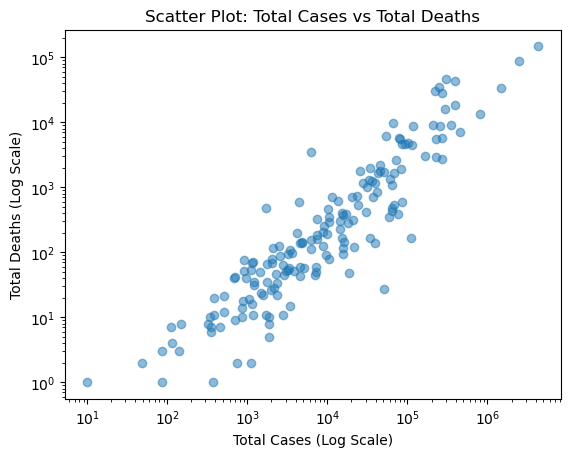

In [26]:
plt.scatter(data['Total_cases'], data['Deaths'], alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Total Cases (Log Scale)')
plt.ylabel('Total Deaths (Log Scale)')
plt.title('Scatter Plot: Total Cases vs Total Deaths')
plt.show()

In [ ]:
data.to_csv("covid_19_country_wise_latest.csv", index=False, encoding='utf-8')
print("covid_19_country_wise_latest saved as 'covid_19_country_wise_latest.csv'")